### Трегубович Е.И., m3206
#### вариант 16(4,3)
# Лабораторная работа №1

In [30]:
import numpy as np
import scipy.stats as st
from itertools import repeat
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

## Задача 1
Исходное распределение: $F_\theta = U[0, \theta], \theta \in (0, 10), \theta = 6$
Экспериментальные значения параметров: $\epsilon = 0.01, \delta = 0.05$.

Найти минимальное $n$, при котором выполняется:
$$
P(|\overline{X} - \mu_\theta| \le \epsilon) \ge 1 - \delta
$$

Сгенерировать 500 выборок найденного объёма и посчитать, сколько раз выборочное среднее отличается от мат. ожидания более чем на $\epsilon$.

In [31]:
eps = 0.01
delta = 0.05
theta = 6
a = 0
b = theta
N = 500

Минимальная $n$ достигается при максимальной $\delta$, значит минимальная $n$ будет в случае
$$
P(|\overline{X} - \mu_\theta| \le \epsilon) = 1 - \delta
$$
ЦПТ утверждает, что сумма $n$ независимых одинаково распределённых величин
имеет распределение, близкое к нормальному.
Закон распределения средней арифметической $\overline{X}$ первых $n$ величин,
имеющих одинаковое мат. ожидание и дисперсию, при увеличении $n$ стремится
к нормальному распределению $\overline{X} \sim N\left(\mu, \frac{\sigma^2}{n}\right)$.
Учитывая это, можно использовать формулу нормального распределения
$$ P(|\overline{X} - \mu_\theta| \le \epsilon) = 2\Phi\left(\frac{\epsilon}{\sigma(X)}\right) = 1 - \delta $$
$$ n = \left(\frac{\sigma\Phi^{-1}\left(\frac{1-\delta}{2}\right)}{\epsilon}\right)^2 $$

In [32]:
xExp = (b + a) / 2
xVar = pow(b - a, 2) / 12
n = round(pow((sqrt(xVar) * st.norm.ppf(0.5 * (1 - delta) + 0.5) / eps), 2))
print("Объём выборки:", n)

Объём выборки: 115244


Сгенерируем данное число выборок, и посчитаем, сколько раз выборочное среднее
отличается от математического ожидания более чем на $\epsilon$

In [33]:
success = sum(abs(mean() - xExp) > eps for mean in repeat(lambda: st.uniform.rvs(loc=a, scale=b-a, size=n).mean(), N))
print(success, "раз из", N, "выборочное среднее отличается от математического ожидания более чем на", eps)

31 раз из 500 выборочное среднее отличается от математического ожидания более чем на 0.01


## Задача 2
 В файле cars93.csv представлены данные об автомобилях.
 Какие типы автомобилей представлены датасете?
 Какой тип наиболее распространен, какой – менее?
 Рассчитайте выборочное среднее, выборочную дисперсию, выборочную медиану и межквартильный размах мощности для всей совокупности автомобилей и отдельно для каждого типа автомобиля.
 Построить график эмпирической функции распределения, гистограмму и box-plot мощности для всей совокупности и отдельно для каждого типа авто.

### Какие типы автомобилей представлены датасете?
### Какой тип наиболее распространен, какой – менее?

In [34]:
data = pd.read_csv('cars93.csv', delimiter=',')

types = set(data['Type'].values)
print("Типы автомобилей:", ', '.join(types))

counts = data['Type'].value_counts()
print("Больше всего", counts.idxmax(), counts.max())
print("Меньше всего", counts.idxmin(), counts.min())

Типы автомобилей: Sporty, Midsize, Van, Large, Compact, Small
Больше всего Midsize 22
Меньше всего Van 9


### Рассчитайте выборочное среднее, выборочную дисперсию, выборочную медиану и межквартильный размах мощности для всей совокупности автомобилей.

In [35]:
print("Выборочное среднее мощности всех автомобилей:", data['Horsepower'].mean())
print("Выборочная дисперсия мощности всех автомобилей:", data['Horsepower'].var())
print("Выборочная медиана мощности всех автомобилей:", data['Horsepower'].median())
print("Межквартильный размах мощности всех автомобилей:", data['Horsepower'].quantile(0.75) - data['Horsepower'].quantile(0.25))

Выборочное среднее мощности всех автомобилей: 143.8279569892473
Выборочная дисперсия мощности всех автомобилей: 2743.0787751285648
Выборочная медиана мощности всех автомобилей: 140.0
Межквартильный размах мощности всех автомобилей: 67.0


### Рассчитайте выборочное среднее, выборочную дисперсию, выборочную медиану и межквартильный размах мощности для всей совокупности автомобилей для каждого типа автомобиля.

In [36]:
print("Выборочное среднее мощности для каждого типа автомобиля:")
print(data.groupby(['Type'])['Horsepower'].mean())
print()
print("Выборочная дисперсия мощности для каждого типа автомобиля:")
print(data.groupby(['Type'])['Horsepower'].var())
print()
print("Выборочная медиана мощности для каждого типа автомобиля:")
print(data.groupby(['Type'])['Horsepower'].median())
print()
print("Межквартильный размах мощности для каждого типа автомобиля:")
print(data.groupby(['Type'])['Horsepower'].quantile(0.75)-data.groupby(['Type'])['Horsepower'].quantile(0.25))

Выборочное среднее мощности для каждого типа автомобиля:
Type
Compact    131.000000
Large      179.454545
Midsize    173.090909
Small       91.000000
Sporty     160.142857
Van        149.444444
Name: Horsepower, dtype: float64

Выборочная дисперсия мощности для каждого типа автомобиля:
Type
Compact     518.533333
Large       477.072727
Midsize    2756.086580
Small       447.600000
Sporty     5536.285714
Van         370.277778
Name: Horsepower, dtype: float64

Выборочная медиана мощности для каждого типа автомобиля:
Type
Compact    132.0
Large      170.0
Midsize    169.0
Small       90.0
Sporty     147.5
Van        151.0
Name: Horsepower, dtype: float64

Межквартильный размах мощности для каждого типа автомобиля:
Type
Compact    33.25
Large      25.00
Midsize    69.00
Small      21.00
Sporty     72.25
Van        23.00
Name: Horsepower, dtype: float64


###  Построить график эмпирической функции распределения, гистограмму и box-plot мощности для всей совокупности авто.

Text(0, 0.5, 'Частота')

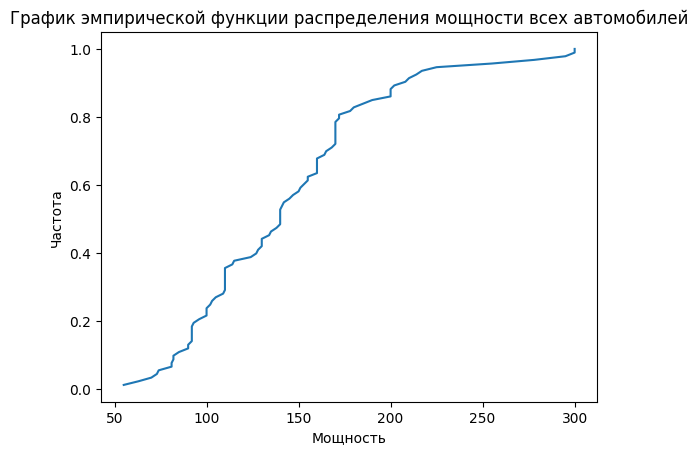

In [37]:
x = np.sort(data['Horsepower'].values)
y = np.arange(1, len(x)+1)/float(len(x))
plt.plot(x, y)
plt.title("График эмпирической функции распределения мощности всех автомобилей")
plt.xlabel("Мощность")
plt.ylabel("Частота")

Text(0, 0.5, 'Частота')

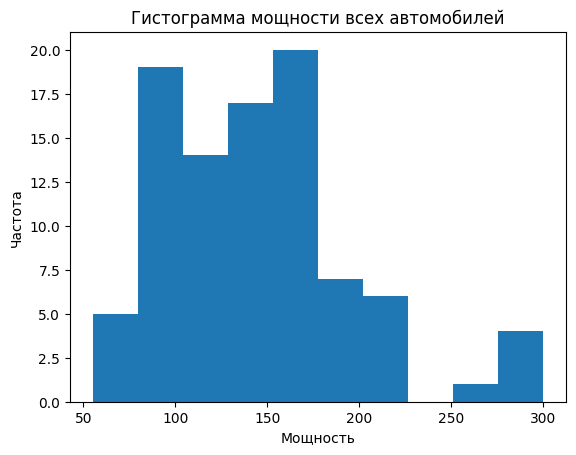

In [38]:
ax = data['Horsepower'].plot(kind="hist", title="Гистограмма мощности всех автомобилей")
ax.set_xlabel("Мощность")
ax.set_ylabel("Частота")

Text(0, 0.5, 'Мощность')

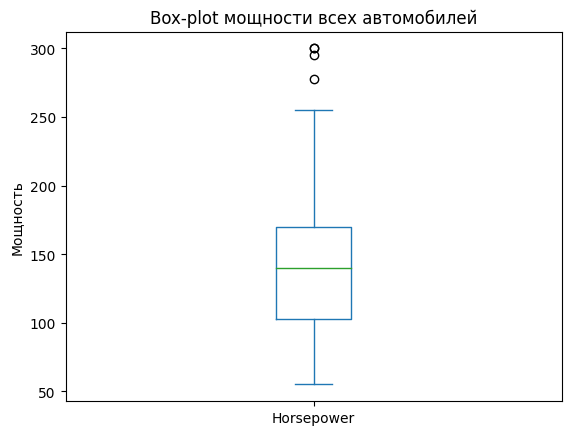

In [39]:
ax = data['Horsepower'].plot(kind="box", title="Box-plot мощности всех автомобилей")
ax.set_ylabel("Мощность")

###  Построить график эмпирической функции распределения, гистограмму и box-plot мощности отдельно для каждого типа авто.

In [40]:
def plot(input, title):
    x = np.sort(input.values)
    y = np.arange(1, len(x)+1)/float(len(x))
    plt.plot(x, y)
    plt.title("График эмпирической функции распределения мощности автомобилей " + title)
    plt.xlabel("Мощность")
    plt.ylabel("Частота")

def barChar(input, title):
    ax = input.plot(kind="hist", title="Гистограмма мощности автомобилей " + title)
    ax.set_xlabel("Мощность")
    ax.set_ylabel("Частота")

def boxPlot(input, title):
    ax = input.plot(kind="box", title="Box-plot мощности автомобилей " + title)
    ax.set_ylabel("Мощность")

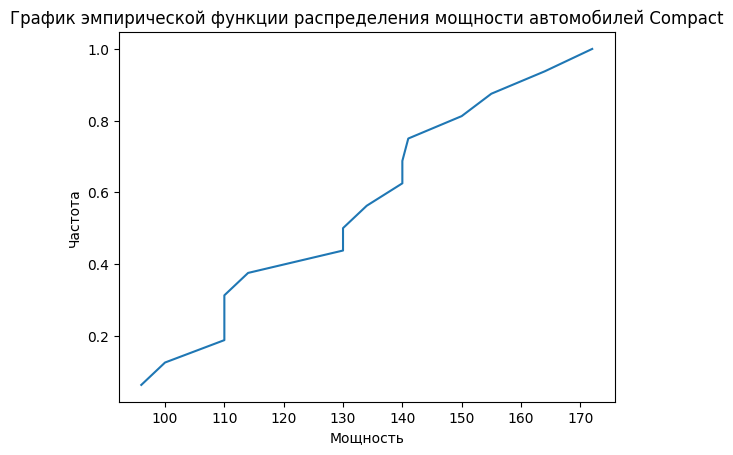

In [41]:
plot(data.loc[(data['Type'] == 'Compact'), 'Horsepower'], "Compact")

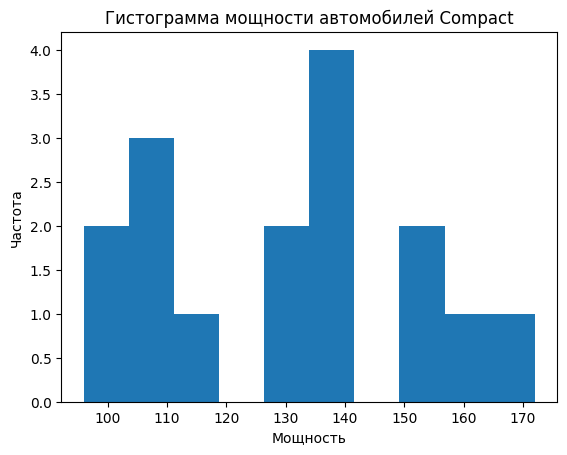

In [42]:
barChar(data.loc[(data['Type'] == 'Compact'), 'Horsepower'], "Compact")

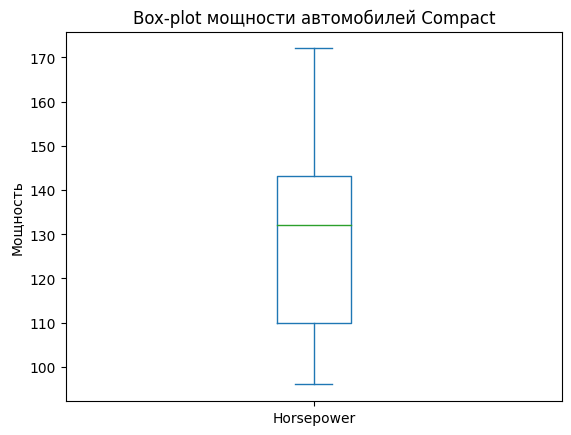

In [43]:
boxPlot(data.loc[(data['Type'] == 'Compact'), 'Horsepower'], "Compact")

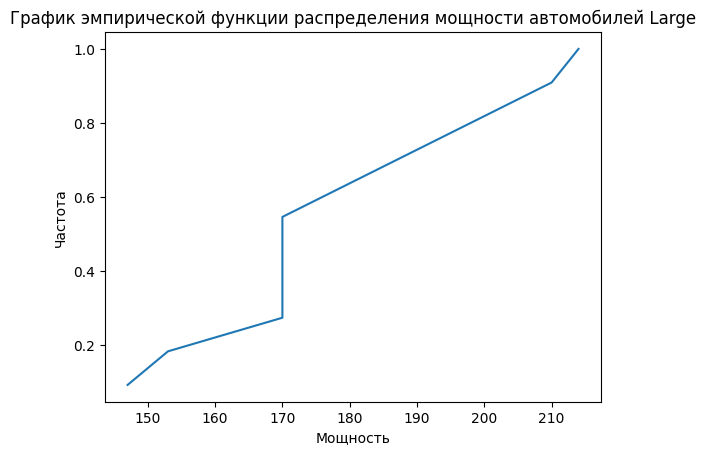

In [44]:
plot(data.loc[(data['Type'] == 'Large'), 'Horsepower'], "Large")

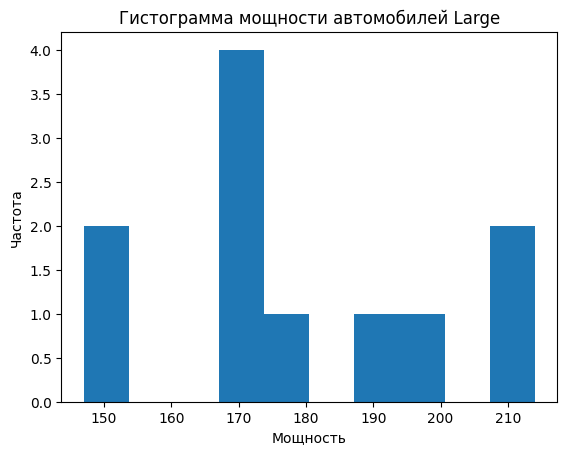

In [45]:
barChar(data.loc[(data['Type'] == 'Large'), 'Horsepower'], "Large")

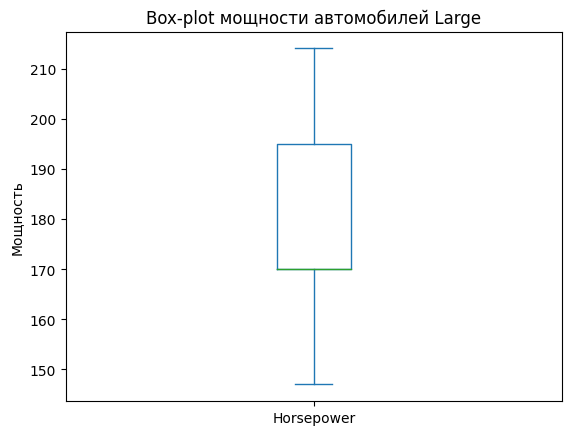

In [46]:
boxPlot(data.loc[(data['Type'] == 'Large'), 'Horsepower'], "Large")

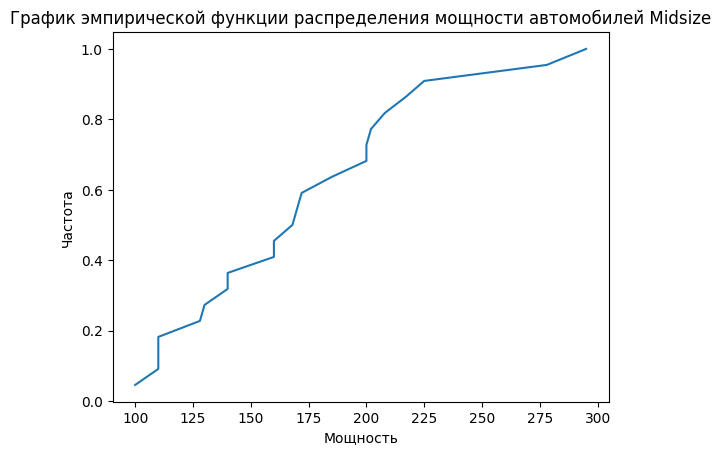

In [47]:
plot(data.loc[(data['Type'] == 'Midsize'), 'Horsepower'], "Midsize")

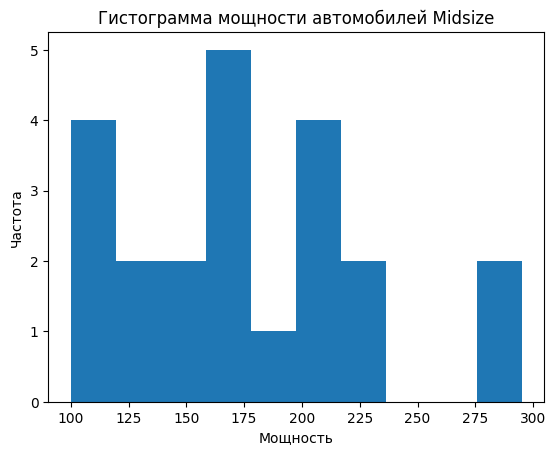

In [48]:
barChar(data.loc[(data['Type'] == 'Midsize'), 'Horsepower'], "Midsize")

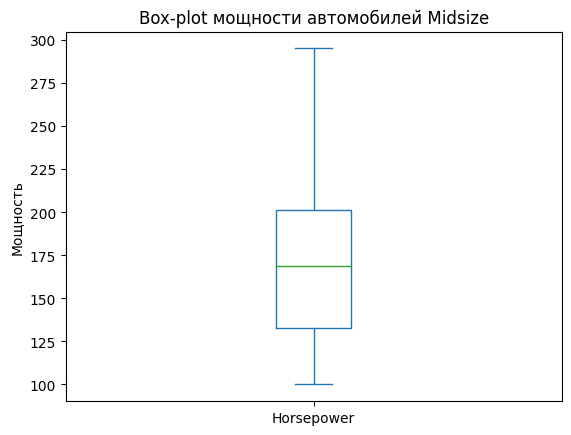

In [49]:
boxPlot(data.loc[(data['Type'] == 'Midsize'), 'Horsepower'], "Midsize")

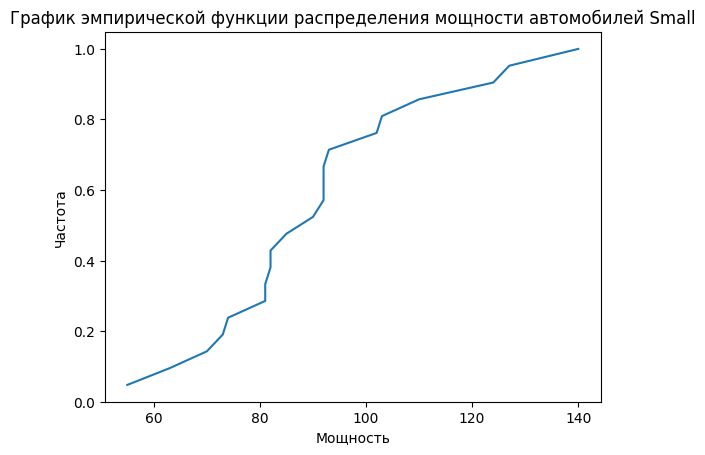

In [50]:
plot(data.loc[(data['Type'] == 'Small'), 'Horsepower'], "Small")

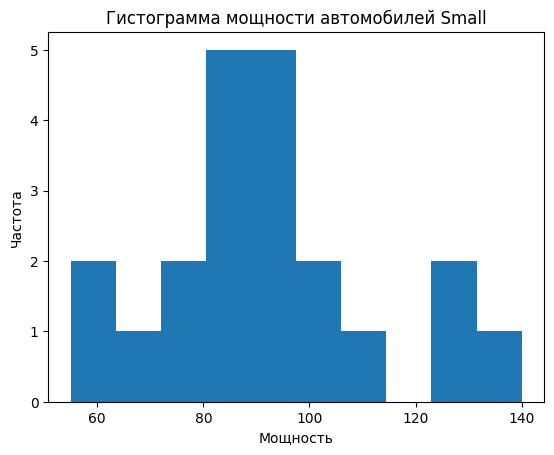

In [51]:
barChar(data.loc[(data['Type'] == 'Small'), 'Horsepower'], "Small")

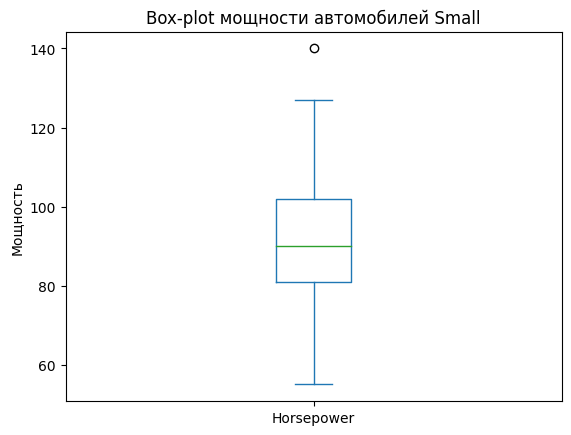

In [52]:
boxPlot(data.loc[(data['Type'] == 'Small'), 'Horsepower'], "Small")

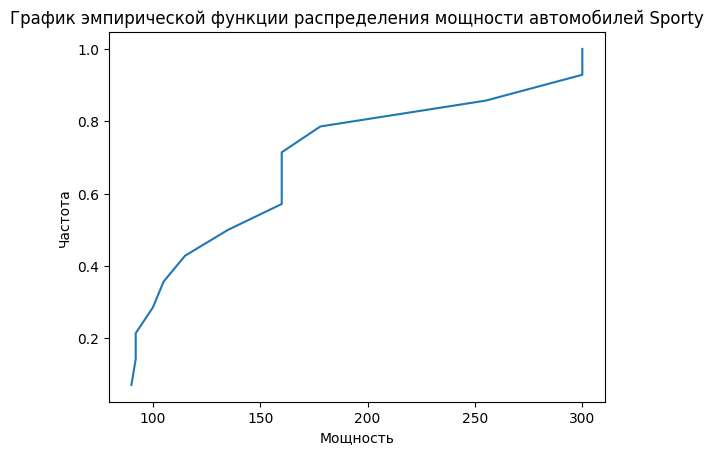

In [53]:
plot(data.loc[(data['Type'] == 'Sporty'), 'Horsepower'], "Sporty")

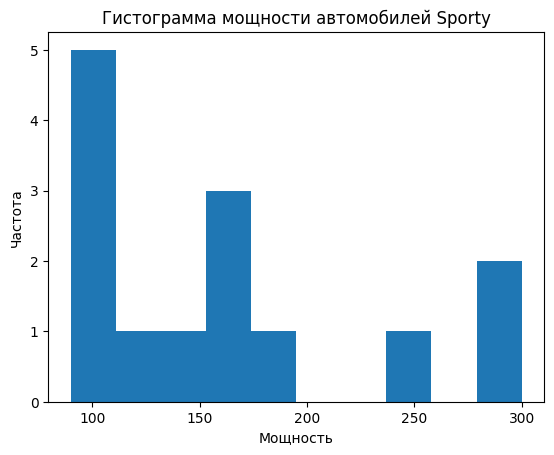

In [54]:
barChar(data.loc[(data['Type'] == 'Sporty'), 'Horsepower'], "Sporty")

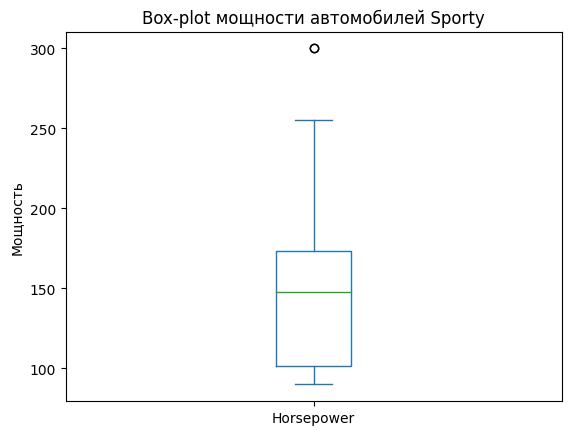

In [55]:
boxPlot(data.loc[(data['Type'] == 'Sporty'), 'Horsepower'], "Sporty")

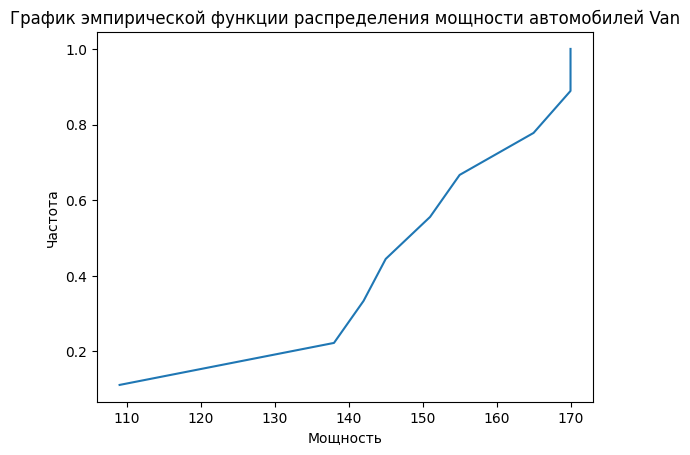

In [56]:
plot(data.loc[(data['Type'] == 'Van'), 'Horsepower'], "Van")

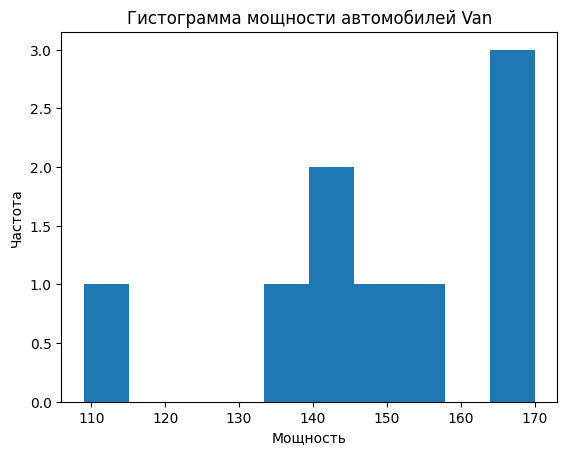

In [57]:
barChar(data.loc[(data['Type'] == 'Van'), 'Horsepower'], "Van")

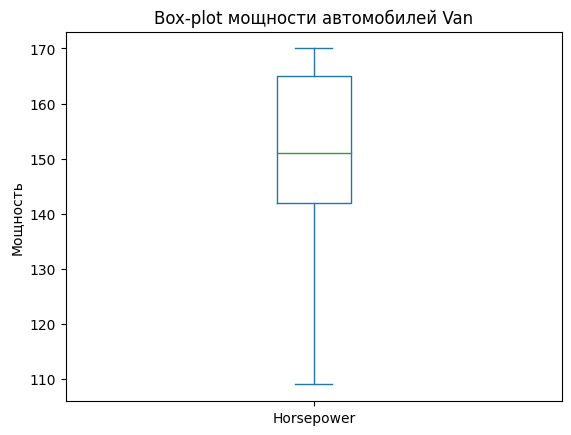

In [58]:
boxPlot(data.loc[(data['Type'] == 'Van'), 'Horsepower'], "Van")